# Use Scipy

### We have the min and max temperatures in a city In India for each months of the year.
### We would like to find a function to describe this and show it graphically, the dataset given below.

### Task:
### 1. fitting it to the periodic function
### 2. plot the fit
### Data
### Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
### Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
import numpy as np
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [2]:
temp_max

array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])

Text(0,0.5,'Min and max temperature')

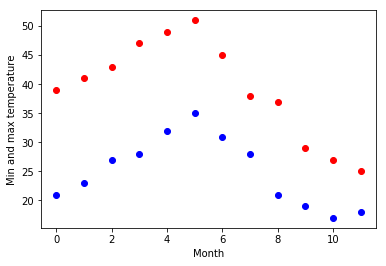

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

months = np.arange(12)

plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')

plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [4]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, temp_min, [-40, 20, 0])

print(res_max)
print(res_min)


[ 39.88861734 -10.59083168   1.33370154]
[25.55626462 -7.74472963  0.93101294]


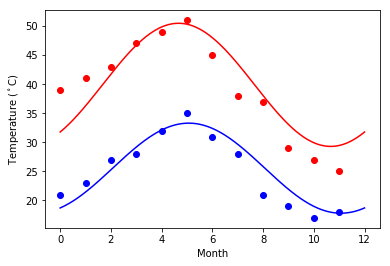

In [5]:
# plot data using params


days = np.linspace(0, 12, num=365)


# plt.figure()

plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
# '-': solid line style


plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')


plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

# Matplotlib:

### data to use:
### url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
### titanic = pd.read_csv(url)
### Charts to plot:
### 1. Create a pie chart presenting the male/female proportion
### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [6]:
import pandas as pd

url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)


In [7]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [9]:
count = titanic['sex'].value_counts()
male_count = count['male']
female_count = count['female']

### 1. Create a pie chart presenting the male/female proportion

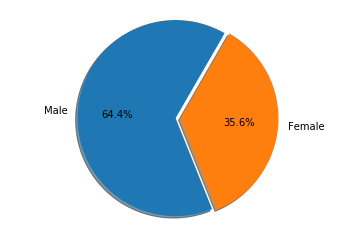

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Male' , 'Female'
sizes = [male_count, female_count]
explode = (0.00, 0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=60)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline


#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
grp = titanic.groupby(["age", "sex"])
grp_unstack = grp.mean()['fare'].unstack()




In [12]:

grp_unstack.head()

sex,female,male
age,,
0.1667,20.5750,NaN
0.3333,NaN,14.4000
0.4167,NaN,8.5167
0.6667,NaN,14.5000
0.7500,19.2583,13.7750


In [13]:
d1 = grp_unstack.male.values # Mean Fare for all Male passengers by age
d2 = grp_unstack.female.values # Mean Fare for all Female passengers by age
d3 = grp_unstack.index.values # Age - Making Asge as Index


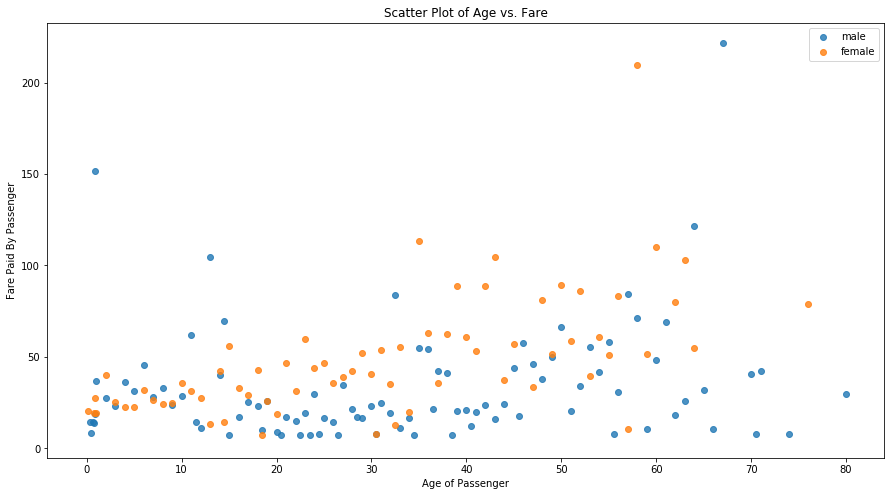

In [14]:
plt.figure(figsize=(15, 8))

plt.scatter(d3, d1, label='male', alpha=0.8,   cmap='viridis')
plt.scatter(d3, d2, label='female', alpha=0.8,   cmap='viridis')


#plt.scatter(d1, d3, label='male', alpha=0.8,   cmap='viridis')
#plt.scatter(d2, d3, label='female', alpha=0.8,   cmap='viridis')

plt.title('Scatter Plot of Age vs. Fare')

plt.ylabel('Fare Paid By Passenger')
plt.xlabel('Age of Passenger');
plt.legend()
